18287.0
0.0001388888888888889


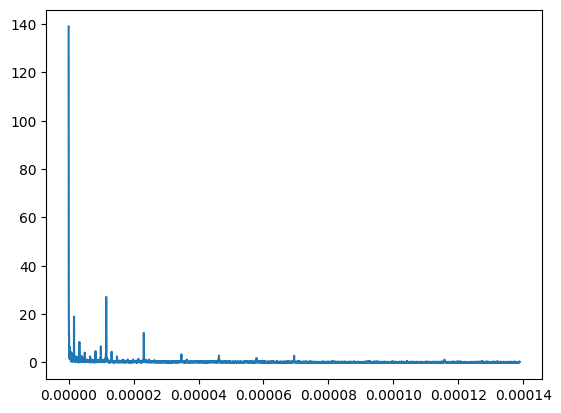

Max components=  {0.00000005}
Max components=  {0.00001158}
Max components=  {0.00000003}
Max components=  {0.00000002}
{0.00001157}
Correlation 1 day=  (0.3695290858725764, 5)
35
Max_c=  35 days
Max_c=  35 days
Max_c=  35 days
Max_c=  35 days
36
Max_c=  36 days
Max_c=  36 days
Max_c=  36 days
Max_c=  36 days
37
Max_c=  37 days
Max_c=  37 days
Max_c=  37 days
Max_c=  37 days
38
Max_c=  38 days
Max_c=  38 days
Max_c=  38 days
Max_c=  38 days
39
Max_c=  39 days
Max_c=  39 days
Max_c=  39 days
Max_c=  39 days
40
Max_c=  40 days
Max_c=  40 days
Max_c=  40 days
Max_c=  40 days
41
Max_c=  41 days
Max_c=  41 days
Max_c=  41 days
Max_c=  41 days
42
Max_c=  42 days
Max_c=  42 days
Max_c=  42 days
Max_c=  42 days
43
Max_c=  43 days
Max_c=  43 days
Max_c=  43 days
Max_c=  43 days
44
Max_c=  44 days
Max_c=  44 days
Max_c=  44 days
Max_c=  44 days
45
Max_c=  45 days
Max_c=  45 days
Max_c=  45 days
Max_c=  45 days
46
Max_c=  46 days
Max_c=  46 days
Max_c=  46 days
Max_c=  46 days
47
Max_c=  47 days


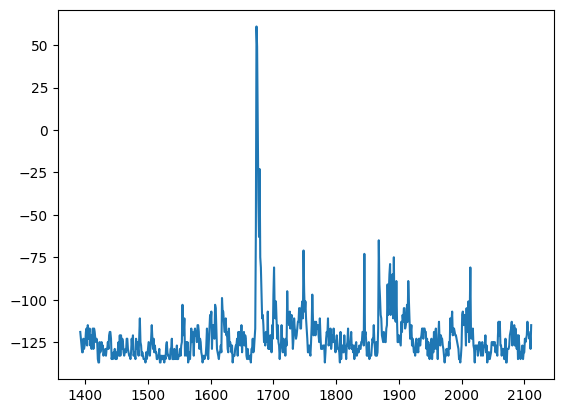

In [50]:
# ex1
# a)
# 1h = 3600s -> fs = 1 / 3600

ts = 3600
fs = 1 / 3600

# b)

import numpy as np

x = np.genfromtxt('Train.csv', delimiter=',')[1:][: , 2]

interval = (len(x) - 1) * ts # secunde
print(interval / 3600) # ore

# c)
max_freq = fs / 2 # 1 / 7200
print(max_freq)

# d)

N = len(x)
X = np.fft.fft(x)
X = np.abs(X / N)
X = X[: N // 2]

f = fs * np.linspace(0, N / 2, N //2) / N

import matplotlib.pyplot as plt
plt.plot(f, X)
plt.show()

# e)
# Prezinta o componenta continua deoarece magnitudinea 
# componentei de frecventa 0 este mai mare decat 0
x -= np.mean(x)
X = np.fft.fft(x)
X = np.abs(X / N)
X = X[: N // 2]

f = fs * np.linspace(0, N / 2, N //2) / N

# f)

max_components = f[np.argpartition(X, -4)[-4:]]
for m in max_components:
    print("Max components= ", "{%.8f}" % m)
print("{%.8f}" % (1 / (3600 * 24)))

def autocorr(x):
    n = x.size
    norm = (x - np.mean(x))
    result = np.correlate(norm, norm, mode='same')
    acorr = result[n//2 + 1:] / (x.var() * np.arange(n-1, n//2, -1))
    lag = np.abs(acorr).argmax() + 1
    r = acorr[lag-1]        
    # if np.abs(r) > 0.5:
    #   print('Appears to be autocorrelated with r = {}, lag = {}'. format(r, lag))
    # else: 
    #   print('Appears to be not autocorrelated')
    return r, lag

print("Correlation 1 day= ", autocorr(x[48 + 1 : 48 + 1 + 24]))

for h in range(10, 31):
    # print("Correlation " + str(h) + " hours= ", autocorr(x[48 : 48 + h]))
    r, lag = autocorr(x[48 : 48 + h])
    
    if np.abs(r) > 0.5:
        for max_c in max_components:
            if np.abs(max_c - fs / h) <= 10 ** -10:
                print("Max_c= ", h, "hours")

for d in range(1, 381):
    # print("Correlation " + str(d) + " days= ", autocorr(x[48 : 48 + d * 24]))
    r, lag = autocorr(x[48 : 48 + d * 24])
    
    if np.abs(r) > 0.5:
        print(d)
        for max_c in max_components:
            if np.abs(max_c - fs / (24 * d)) <= 10 ** -2:
                print("Max_c= ", d, "days")

# prima componenta = 1 / (3600 * 24) corespunde fenomenului de zi / noapte

# g)

# punctul 48 reprezinta o zi de luni, ora 00:00 in csv
start = 48 + 7 * 24 * 8
plt.plot(range(start, start + 30 * 24), x[start : start + 30 * 24])
plt.show()

# h)


# i)

def filterComponents(X, indices):
    for i in indices:
        X[i] = 0
        if i:
            X[-i] = 0
    return np.abs(np.fft.ifft(X))

